In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100




In [14]:

white_wine=pd.read_csv('Wine Quality/winequality-white.csv')
white_wine = pd.read_csv('Wine Quality/winequality-white.csv',sep=';')
white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 1
if x <= 5 else 2
if x <= 7 else 3)

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],categories=[1, 2,3])

X = white_wine
y = white_wine['quality_label']
X.drop(['quality_label','quality'],axis=1,inplace=True)
#print(y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
#Create a function within many Machine Learning Models
def models1(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 10)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_test,y_test))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_test,y_test))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_test,y_test))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_test,y_test))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_test,y_test))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_test,y_test))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_test,y_test))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [27]:
models1(X_train,y_train)



[0]Logistic Regression Training Accuracy: 0.636734693877551
[1]K Nearest Neighbor Training Accuracy: 0.6285714285714286
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6938775510204082
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6061224489795919
[4]Gaussian Naive Bayes Training Accuracy: 0.6418367346938776
[5]Decision Tree Classifier Training Accuracy: 0.7295918367346939
[6]Random Forest Classifier Training Accuracy: 0.7959183673469388


(LogisticRegression(random_state=10),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

<AxesSubplot:title={'center':'Machine Learning Models Accuracy on White Wines'}>

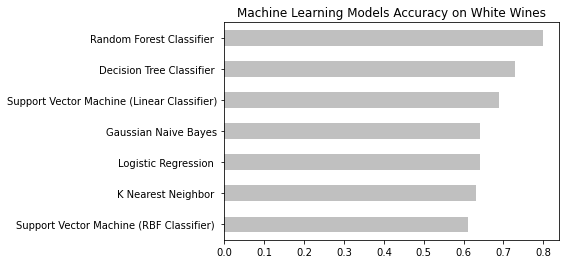

In [28]:
d = {'Logistic Regression ': [0.64],'K Nearest Neighbor ': [ 0.63],
'Support Vector Machine (Linear Classifier)': [0.69],'Support Vector Machine (RBF Classifier) ': [0.61], "Gaussian Naive Bayes": [0.64],
'Decision Tree Classifier ': [0.73], 'Random Forest Classifier ': [0.80]}
df = pd.DataFrame(data=d)
df=df.T


df.sort_values(0,ascending=True,inplace=True)
df.plot.barh(color= 'silver',title='Machine Learning Models Accuracy on White Wines', legend=None)


In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = rfc.score(X_test, y_test)
print("The training accuracy for Random Forest is:", rfc.score(X_train, y_train)*100, "%")
print("The testing accuracy for Random Forest is:", rfc_acc * 100, "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 80.3061224489796 %


In [30]:
clf = RandomForestClassifier(max_depth=5,random_state=0)
clf.fit(X_train,y_train)
pred_random = clf.predict(X_test)
pred_random2 = clf.predict(X_train)

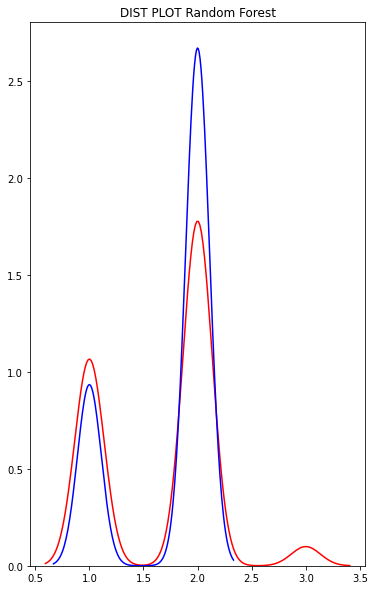

In [31]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_random, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

for plotting graph of test

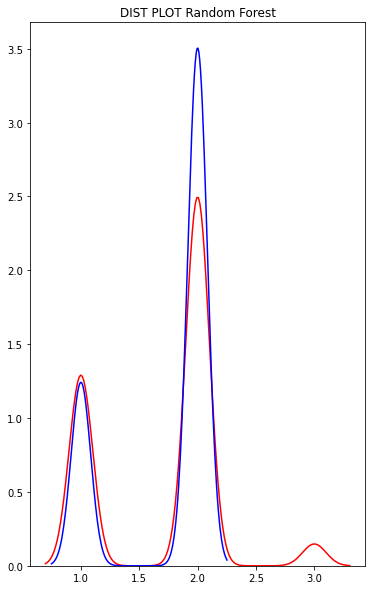

In [32]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(pred_random2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT Random Forest')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

for plotting graph of train

Feature: 0, Score: 0.06831
Feature: 1, Score: 0.11361
Feature: 2, Score: 0.07949
Feature: 3, Score: 0.08433
Feature: 4, Score: 0.08512
Feature: 5, Score: 0.09871
Feature: 6, Score: 0.08832
Feature: 7, Score: 0.10707
Feature: 8, Score: 0.07800
Feature: 9, Score: 0.07059
Feature: 10, Score: 0.12646


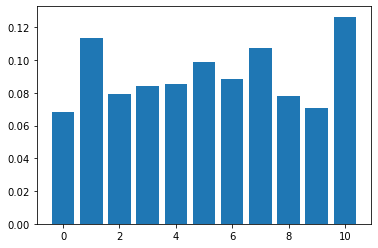

In [33]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



In [11]:
X.drop(['density'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8


In [35]:
##importing module
#from sklearn.preprocessing import MinMaxScaler
## creating normalization object 
#norm = MinMaxScaler()
## fit data
#norm_fit = norm.fit(X_train)
#new_xtrain = norm_fit.transform(X_train)
#new_xtest = norm_fit.transform(X_test)
## display values
#print(new_xtrain)

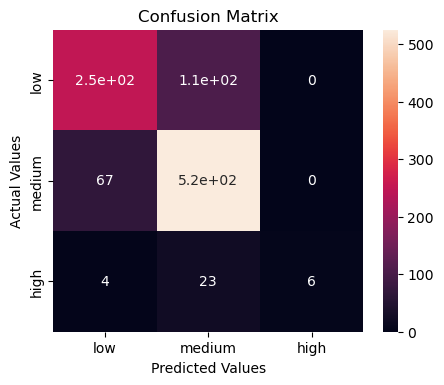

Accuracy score: 0.7959183673469388
              precision    recall  f1-score   support

         low       0.78      0.70      0.74       355
      medium       0.80      0.89      0.84       592
        high       1.00      0.18      0.31        33

    accuracy                           0.80       980
   macro avg       0.86      0.59      0.63       980
weighted avg       0.80      0.80      0.79       980

Cohen-Kappa score: 0.5733881253890656


In [15]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [37]:
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, pred_RF))
#from sklearn import metrics
#print(metrics.accuracy_score(y_test, pred_RF))

In [38]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.704592880096824


In [39]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   6.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   6.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   6.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   9.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   9.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   9.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_e

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [23]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [24]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.8
[[234 121   0]
 [ 48 543   1]
 [  1  25   7]]


In [41]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   7.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   8.1s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   8.5s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   8.5s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   8.6s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   8.7s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1250; total time=   8.7s

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [42]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 1350}

In [43]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.7744897959183673
[[214 141   0]
 [ 47 545   0]
 [  0  33   0]]


In [44]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.704592880096824


Random decision trees or random forest are an ensemble learning method for classification, regression, etc. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes or classification or mean prediction(regression) of the individual trees.

A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature. The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

Advantages and Disadvantages

The advantage of the random forest is that it is more accurate than the decision trees due to the reduction in the over-fitting. The only disadvantage with the random forest classifiers is that it is quite complex in implementation and gets pretty slow in real-time prediction.

In [45]:


X.drop(['free sulfur dioxide'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,3.34,0.38,12.8


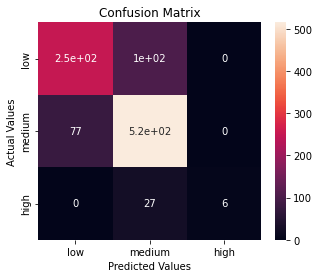

Accuracy score: 0.7877551020408163
              precision    recall  f1-score   support

         low       0.77      0.71      0.73       355
      medium       0.80      0.87      0.83       592
        high       1.00      0.18      0.31        33

    accuracy                           0.79       980
   macro avg       0.85      0.59      0.62       980
weighted avg       0.79      0.79      0.78       980

Cohen-Kappa score: 0.5581470964385581


In [47]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   9.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   9.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_e

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [51]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.7877551020408163
[[223 132   0]
 [ 49 542   1]
 [  0  26   7]]


In [52]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   4.3s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   4.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   4.7s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   4.8s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   4.8s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1250; total time=   4.9s

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [53]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 1150}

In [54]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.7714285714285715
[[210 145   0]
 [ 46 546   0]
 [  0  33   0]]


In [55]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.6894824923834564


Feature: 0, Score: 0.07677
Feature: 1, Score: 0.12192
Feature: 2, Score: 0.09136
Feature: 3, Score: 0.09692
Feature: 4, Score: 0.08762
Feature: 5, Score: 0.10163
Feature: 6, Score: 0.11110
Feature: 7, Score: 0.08687
Feature: 8, Score: 0.07937
Feature: 9, Score: 0.14645


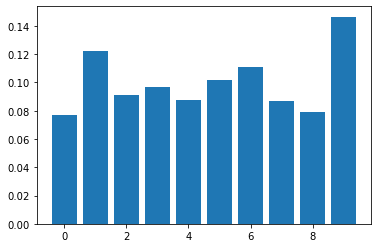

In [56]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()